# GPU Notebook

In [1]:
import pandas as pd
import numpy as np
import tensorflow
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import cv2
import imageio
import skimage
import skimage.io
import skimage.transform
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt

In [2]:
#check files in directory
os.listdir('./breast-histopathology-images/IDC_regular_ps50_idx5/')

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '12932',
 '12933',


In [3]:
# got help from https://towardsdatascience.com/analysing-breast-cancer-using-deep-learning-e3426f768c52
patients = os.listdir('./breast-histopathology-images/IDC_regular_ps50_idx5/')
len(patients)

279

In [4]:
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

In [8]:
patient_list = os.listdir('../input/breast-histopathology-images/IDC_regular_ps50_idx5')

for patient in patient_list:
    
    path_0 = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/' + str(patient) + '/0'
    path_1 = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/' + str(patient) + '/1'


    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [9]:
len(os.listdir('all_images_dir'))

277524

In [10]:
image_list = os.listdir('all_images_dir')

df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()

,image_id
0,8951_idx5_x1351_y1601_class0.png
1,13459_idx5_x2301_y1351_class0.png
2,8863_idx5_x2601_y351_class0.png
3,12824_idx5_x1551_y1151_class0.png
4,12891_idx5_x1801_y1951_class0.png


In [11]:
# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head(10)

,image_id,patient_id,target
0,8951_idx5_x1351_y1601_class0.png,8951,0
1,13459_idx5_x2301_y1351_class0.png,13459,0
2,8863_idx5_x2601_y351_class0.png,8863,0
3,12824_idx5_x1551_y1151_class0.png,12824,0
4,12891_idx5_x1801_y1951_class0.png,12891,0
5,13617_idx5_x1101_y601_class0.png,13617,0
6,9176_idx5_x601_y1801_class0.png,9176,0
7,12951_idx5_x2751_y1151_class0.png,12951,0
8,9073_idx5_x3501_y201_class0.png,9073,0
9,16085_idx5_x451_y1751_class0.png,16085,0


In [12]:
df_data.shape

(277524, 3)

In [13]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

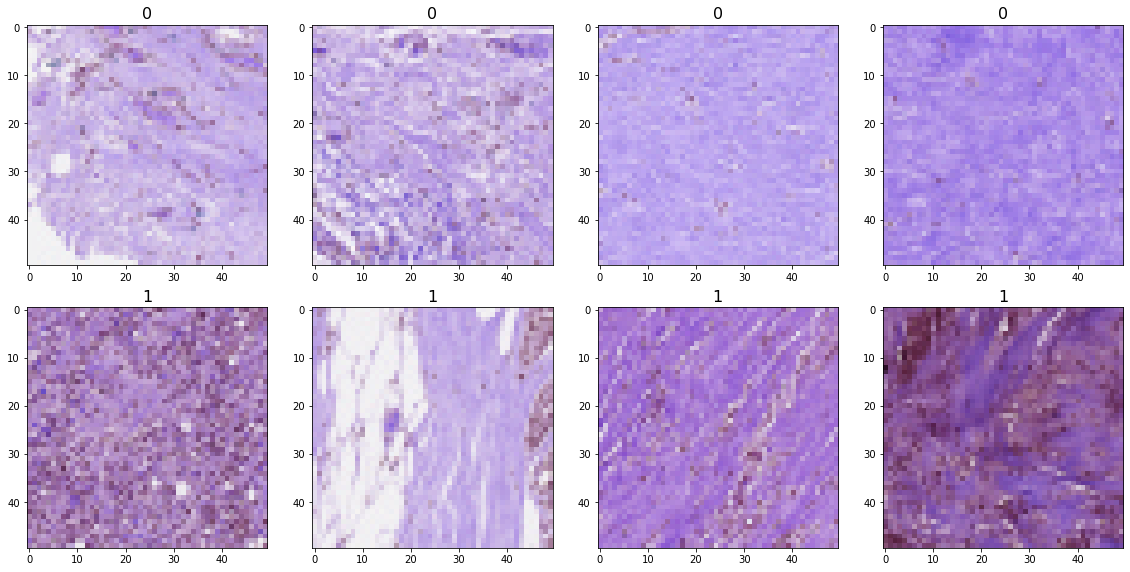

In [14]:
IMAGE_PATH = 'all_images_dir/'

draw_category_images('target',4, df_data, IMAGE_PATH)

In [15]:
df_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [16]:
df_0 = df_data[df_data['target'] == '0'].sample(78786, random_state=101)
# take a sample of class 1 (total = 78786)
df_1 = df_data[df_data['target'] == '1'].sample(78786, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()

1    78786
0    78786
Name: target, dtype: int64

In [17]:
y = df_data['target']

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=1984, stratify=y)

print(df_train.shape)
print(df_val.shape)

(141814, 3)
(15758, 3)


In [18]:
df_train['target'].value_counts()

1    70907
0    70907
Name: target, dtype: int64

In [19]:
df_val['target'].value_counts()

1    7879
0    7879
Name: target, dtype: int64

In [20]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

In [21]:
os.listdir('base_dir/train_dir')

['b_has_idc', 'a_no_idc']

In [22]:
df_data.set_index('image_id', inplace=True)

In [23]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    

    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [24]:
print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


In [25]:
print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))

7879
7879


In [26]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [27]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(50,50),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(50,50),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(50,50),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


In [28]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (50, 50, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        3

In [29]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [30]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=60, verbose=1,
                    callbacks=callbacks_list)

Train for 14182.0 steps, validate for 1576.0 steps
Epoch 1/60
14182/14182 [==============================] - 146s 10ms/step - loss: 0.4649 - accuracy: 0.7922 - val_loss: 0.4133 - val_accuracy: 0.8247
Epoch 2/60
14182/14182 [==============================] - 134s 9ms/step - loss: 0.4039 - accuracy: 0.8244 - val_loss: 0.3868 - val_accuracy: 0.8346
Epoch 3/60
14182/14182 [==============================] - 134s 9ms/step - loss: 0.3797 - accuracy: 0.8383 - val_loss: 0.3781 - val_accuracy: 0.8453
Epoch 4/60
14182/14182 [==============================] - 135s 9ms/step - loss: 0.3650 - accuracy: 0.8470 - val_loss: 0.3558 - val_accuracy: 0.8516
Epoch 5/60
14182/14182 [==============================] - 134s 9ms/step - loss: 0.3554 - accuracy: 0.8514 - val_loss: 0.3909 - val_accuracy: 0.8299
Epoch 6/60
14182/14182 [==============================] - 134s 9ms/step - loss: 0.3473 - accuracy: 0.8550 - val_loss: 0.3463 - val_accuracy: 0.8566
Epoch 7/60
14182/14182 [==============================] - 13

In [32]:
val_loss, val_acc = \
model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.29186333808502324
val_acc: 0.8865973


<Figure size 432x288 with 0 Axes>

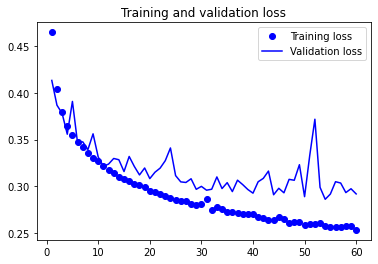

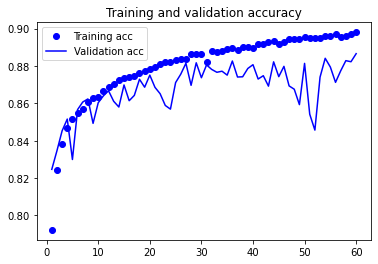

<Figure size 432x288 with 0 Axes>

In [35]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [36]:
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

15758/15758 [==============================] - 40s 3ms/step


In [37]:
predictions.shape

(15758, 2)

In [38]:
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [39]:
df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()

,no_idc,has_idc
0,0.998382,0.001618
1,0.464633,0.535367
2,0.144085,0.855915
3,0.829854,0.170146
4,0.788601,0.211399


In [40]:
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9499026162637807

In [42]:
test_labels = test_gen.classes

In [45]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[6814 1065]
 [ 722 7157]]


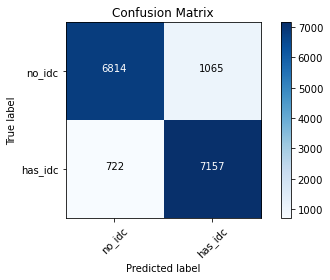

In [50]:
cm_plot_labels = ['no_idc', 'has_idc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
skplt.metrics.plot_roc_curve(y_true, predictions)
plt.show()